In [1]:
# Main imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import pdb

import matplotlib.gridspec as gridspec

import helper_functions

from helper_functions import \
    thermodynamic_model, \
    plot_manifold_model, \
    plot_manifold_measurements, \
    get_clonal_measurements_df, \
    get_resampled_params_df, \
    get_distance_params_df

%matplotlib inline

#
# Set global styles
#

textwidth=5.5
halfcolwidth=3
fontsize=8
titlesize=10
panel_label_size=12
markersize=5
mpl.rcParams['font.size'] = fontsize
mpl.rcParams['text.usetex'] = False

color_strong = np.array([.11, .69, .93])
color_weak = np.array([1.00, .94, .21])

# Get default colors
prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']

def annotate_regime(x,y,n,color):
    ax.plot(x,y,'o',
            markersize=10,
            markeredgecolor=color,
            markerfacecolor='white',
            markeredgewidth=.5)
    ax.text(x,y,'%d'%n,
            color=color,
            horizontalalignment='center',
            verticalalignment='center',
            fontsize=8,
            fontweight='regular')
    
# Conversion parameter
kbt_to_kcal = 1/1.62
    
# Load results in data frames
data_df = get_clonal_measurements_df()
c61_model_df = get_resampled_params_df('c61')
ocl_model_df = get_resampled_params_df('occlusion')
distance_df = get_distance_params_df()

### Figure 1

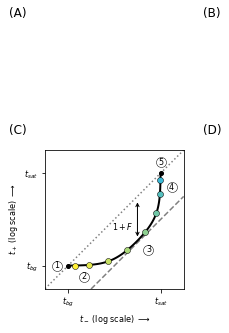

In [2]:
### Figure 1C: Occlusion theory ###

fig, _ = plt.subplots(figsize=[textwidth,4.5])
color='black'

gs = gridspec.GridSpec(1, 1, top=.55, bottom=.10, left=.10, right=.45)
ax = plt.subplot(gs[0,0])

# P values for continuous curve
Ps = np.logspace(-5,4,100)

# P values for dots
Pdots = np.logspace(-4,2,8)

t_sat=1
alpha=0
F=100
beta=1
t_bg=1E-4
lim = np.array([1E-5,1E1])

alpha_prime = (1+alpha*F)/(1+F)
beta_prime = (1+alpha*beta*F)/(1+alpha*F)

# print 'alpha_prime / alpha = %f'%(alpha_prime/alpha)
# print 'beta_prime / beta = %f'%(beta_prime/beta)

xs = thermodynamic_model(t_sat=t_sat, P=Ps, F=0, alpha=alpha, beta=beta, t_bg=t_bg)
ys = thermodynamic_model(t_sat=t_sat, P=Ps, F=F, alpha=alpha, beta=beta, t_bg=t_bg)

#lim = np.array([.1*min(min(xs),min(ys)), 10*max(max(xs),max(ys))])

ax.set_ylabel("$t_+$ (log scale) $\\longrightarrow$")
ax.set_xlabel("$t_-$ (log scale) $\\longrightarrow$")

# gridlines
#ax.axvline(t_bg,linestyle=':',color='k', alpha=.5)
#ax.axvline(t_sat,linestyle=':',color='k', alpha=.5)
ax.loglog(lim,lim,':', color='k', alpha=.5)
#ax.axhline(t_bg,linestyle=':',color='k', alpha=.5)
#ax.axhline(t_sat,linestyle=':',color='k', alpha=.5)

# maximal repression line
ax.loglog(lim,alpha_prime*lim,'--',color='k', alpha=.5)

# activation curve
ax.loglog(xs,ys, linewidth=2, solid_capstyle='round', color=color)
ax.loglog(t_sat,beta_prime*t_sat,markersize=4,marker='o',color=color)
ax.loglog(t_bg,t_bg,markersize=4,marker='o',color=color)


xdots = thermodynamic_model(t_sat=t_sat, P=Pdots, F=0, alpha=alpha, beta=beta, t_bg=t_bg)
ydots = thermodynamic_model(t_sat=t_sat, P=Pdots, F=F, alpha=alpha, beta=beta, t_bg=t_bg)
for i, P in enumerate(Pdots):
    f = 1 - i/len(Pdots-1)
    color = f*np.array(color_weak) + (1-f)*np.array(color_strong)
    ax.loglog(xdots[i], ydots[i], marker='o', color=color, alpha=1, markersize=6, 
              markeredgewidth=.5, markeredgecolor='k')

# Annotate regimes
annotate_regime(t_bg/3,t_bg,n=1,color='k')
annotate_regime(t_bg*5,t_bg/3,n=2,color='k')
annotate_regime(t_sat*3E-1,alpha_prime*t_sat*5E-2,n=3,color='k')
annotate_regime(t_sat*3,t_sat/4,n=4,color='k')
annotate_regime(t_sat,t_sat*3,n=5,color='k')

# annotation of maximal repression level
arrow_x = 1E-1
arrow_yhi = arrow_x/1.5
arrow_ylo = arrow_x*alpha_prime*1.5
arrow_ymid = np.sqrt(arrow_ylo*arrow_yhi)/2
ax.annotate('',
            xy=(arrow_x, arrow_ylo), 
            xytext=(arrow_x, arrow_yhi),
            arrowprops={'arrowstyle':'<->'})
ax.text(arrow_x/1.5, arrow_ymid, '$1+F$', horizontalalignment='right', verticalalignment='center')

# tickmarks
ax.set_yticks([t_bg, t_sat])
ax.set_yticklabels(['$t_{bg}$', '$t_{sat}$'])
ax.set_xticks([t_bg, t_sat])
ax.set_xticklabels(['$t_{bg}$', '$t_{sat}$'])
ax.get_xaxis().set_tick_params(which='minor', size=0) 
ax.get_yaxis().set_tick_params(which='minor', size=0)
# ax.xaxis.tick_top()
# ax.yaxis.tick_right()

# Set limits and aspect
ax.set_xlim(lim)
ax.set_ylim(lim)
ax.set_aspect('equal')

plt.figtext(.01,.98,'(A)', fontsize=panel_label_size, horizontalalignment='left', 
            verticalalignment='top')
plt.figtext(.50,.98,'(B)', fontsize=panel_label_size, horizontalalignment='left', 
            verticalalignment='top')
plt.figtext(.01,.62,'(C)', fontsize=panel_label_size, horizontalalignment='left', 
            verticalalignment='top')
plt.figtext(.50,.62,'(D)', fontsize=panel_label_size, horizontalalignment='left', 
            verticalalignment='top')

fig.savefig('../figures/plt_figure_1.pdf', transparent=True)

### Figure 3

alpha_prime / alpha = 0.990132


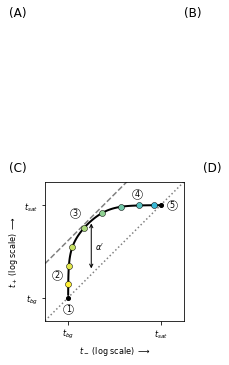

In [3]:
### Figure 3: stabilization theory ###

fig, _ = plt.subplots(figsize=[textwidth,5])
color='black'

gs = gridspec.GridSpec(1, 1, top=.50, bottom=.10, left=.10, right=.45)
ax = plt.subplot(gs[0,0])

# P values for continuous curve
Ps = np.logspace(-7,1,100)

# P values for dots
Pdots = np.logspace(-6,0,8)

t_sat=1
alpha=300
F=100
beta=1
t_bg=1E-4
lim = np.array([1E-5,1E1])

alpha_prime = (1+alpha*F)/(1+F)

print('alpha_prime / alpha = %f'%(alpha_prime/alpha))

xs = thermodynamic_model(t_sat=t_sat, P=Ps, F=0, alpha=alpha, beta=beta, t_bg=t_bg)
ys = thermodynamic_model(t_sat=t_sat, P=Ps, F=F, alpha=alpha, beta=beta, t_bg=t_bg)

#lim = np.array([.1*min(min(xs),min(ys)), 10*max(max(xs),max(ys))])

ax.set_ylabel("$t_+$ (log scale) $\\longrightarrow$")
ax.set_xlabel("$t_-$ (log scale) $\\longrightarrow$")

# gridlines
#ax.axvline(t_bg,linestyle=':',color='k', alpha=.5)
#ax.axvline(t_sat,linestyle=':',color='k', alpha=.5)
ax.loglog(lim,lim,':', color='k', alpha=.5)
#ax.axhline(t_bg,linestyle=':',color='k', alpha=.5)
#ax.axhline(t_sat,linestyle=':',color='k', alpha=.5)

# maximal repression line
ax.loglog(lim,alpha_prime*lim,'--',color='k', alpha=.5)

# activation curve
ax.loglog(xs,ys, linewidth=2, solid_capstyle='round', color=color)
ax.loglog(t_sat,beta_prime*t_sat,markersize=4,marker='o',color=color)
ax.loglog(t_bg,t_bg,markersize=4,marker='o',color=color)


xdots = thermodynamic_model(t_sat=t_sat, P=Pdots, F=0, alpha=alpha, beta=beta, t_bg=t_bg)
ydots = thermodynamic_model(t_sat=t_sat, P=Pdots, F=F, alpha=alpha, beta=beta, t_bg=t_bg)
for i, P in enumerate(Pdots):
    f = 1 - i/len(Pdots-1)
    color = f*np.array(color_weak) + (1-f)*np.array(color_strong)
    ax.loglog(xdots[i], ydots[i], marker='o', color=color, alpha=1, markersize=6, 
              markeredgewidth=.5, markeredgecolor='k')

# Annotate regimes
t_mid = np.sqrt(t_bg*t_sat)
annotate_regime(t_bg,t_bg/3,n=1,color='k')
annotate_regime(t_bg/3,t_bg*10,n=2,color='k')
annotate_regime(t_mid*2E-2,alpha_prime*t_mid*1.5E-1,n=3,color='k')
annotate_regime(t_sat/10,t_sat*3,n=4,color='k')
annotate_regime(t_sat*3,t_sat,n=5,color='k')

# annotation of maximal repression level
arrow_x = 1E-3
arrow_ylo = arrow_x*1.5
arrow_yhi = arrow_x*alpha_prime/1.5
arrow_ymid = np.sqrt(arrow_ylo*arrow_yhi)
ax.annotate('',
            xy=(arrow_x, arrow_ylo), 
            xytext=(arrow_x, arrow_yhi),
            arrowprops={'arrowstyle':'<->'})
ax.text(arrow_x*1.5, arrow_ymid, "$\\alpha'$", horizontalalignment='left', verticalalignment='center')

# tickmarks
ax.set_yticks([t_bg, t_sat])
ax.set_yticklabels(['$t_{bg}$', '$t_{sat}$'])
ax.set_xticks([t_bg, t_sat])
ax.set_xticklabels(['$t_{bg}$', '$t_{sat}$'])
ax.get_xaxis().set_tick_params(which='minor', size=0) 
ax.get_yaxis().set_tick_params(which='minor', size=0)
# ax.xaxis.tick_top()
# ax.yaxis.tick_right()

# Set limits and aspect
ax.set_xlim(lim)
ax.set_ylim(lim)
ax.set_aspect('equal')

plt.figtext(.01,.98,'(A)', fontsize=panel_label_size, horizontalalignment='left', 
            verticalalignment='top')
plt.figtext(.45,.98,'(B)', fontsize=panel_label_size, horizontalalignment='left', 
            verticalalignment='top')
plt.figtext(.01,.55,'(C)', fontsize=panel_label_size, horizontalalignment='left', 
            verticalalignment='top')
plt.figtext(.50,.55,'(D)', fontsize=panel_label_size, horizontalalignment='left', 
            verticalalignment='top')

fig.savefig('../figures/plt_figure_3.pdf', transparent=True)

### Figure 5

alpha_prime / alpha = 0.991089
beta_prime / beta = 0.999034


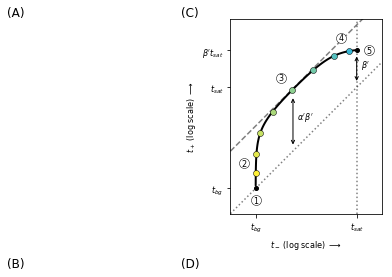

In [4]:
### Figure 5: Acceleration model ###

# Create figure and axes
fig, axs = plt.subplots(figsize=[textwidth,6])
color='black'

gs = gridspec.GridSpec(1, 1, top=.95, bottom=.5, left=.55, right=.98)
ax = plt.subplot(gs[0,0])

lim = np.array([1E-5,1E1])

# P values for continuous curve
Ps = np.logspace(-7,1,100)

# P values for dots
Pdots = np.logspace(-6,0,8)

t_sat=1
alpha=10
F=100
beta=30
t_bg=1E-4

alpha_prime = (1+alpha*F)/(1+F)
beta_prime = (1+alpha*beta*F)/(1+alpha*F)

print('alpha_prime / alpha = %f'%(alpha_prime/alpha))
print('beta_prime / beta = %f'%(beta_prime/beta))

# Compute expression manifold
xs = thermodynamic_model(t_sat=t_sat, P=Ps, F=0, alpha=alpha, beta=beta, t_bg=t_bg)
ys = thermodynamic_model(t_sat=t_sat, P=Ps, F=F, alpha=alpha, beta=beta, t_bg=t_bg)

# gridlines
#ax.axhline(t_bg,linestyle=':',color='k', alpha=.5)
ax.loglog(lim,lim,':', color='k', alpha=.5)
ax.axvline(t_sat,linestyle=':',color='k', alpha=.5)
#ax.axhline(t_sat,linestyle=':',color='k', alpha=.5)

# background line
# ax.axvline(t_bg,linestyle='--',color='r', alpha=.5)

# maximal activation line
ax.loglog(lim,alpha_prime*beta_prime*lim,'--',color='k', alpha=.5)

# saturation line
#ax.axhline(beta_prime*t_sat,linestyle=':',color='k', alpha=.5)

# activation curve
ax.loglog(xs,ys, linewidth=2, solid_capstyle='round', color=color)
ax.loglog(t_sat,beta_prime*t_sat,markersize=4,marker='o',color=color)
ax.loglog(t_bg,t_bg,markersize=4,marker='o',color=color)

xdots = thermodynamic_model(t_sat=t_sat, P=Pdots, F=0, alpha=alpha, beta=beta, t_bg=t_bg)
ydots = thermodynamic_model(t_sat=t_sat, P=Pdots, F=F, alpha=alpha, beta=beta, t_bg=t_bg)
for i, P in enumerate(Pdots):
    f = 1 - i/len(Pdots-1)
    color = f*np.array(color_weak) + (1-f)*np.array(color_strong)
    ax.loglog(xdots[i], ydots[i], marker='o', color=color, alpha=1, markersize=6, 
              markeredgewidth=.5, markeredgecolor='k')
    
# Annotate regimes
annotate_regime(t_bg,t_bg/3,n=1,color='k')
annotate_regime(t_bg/3,t_bg*10,n=2,color='k')
annotate_regime(t_sat*1E-3,alpha_prime*beta_prime*t_sat*8E-3,n=3,color='k')
annotate_regime(t_sat/4,beta_prime*t_sat*3,n=4,color='k')
annotate_regime(t_sat*3,beta_prime*t_sat,n=5,color='k')

# annotation of maximal activation level
arrow_x = 3E-3
arrow_yhi = arrow_x*beta_prime*alpha_prime/2
arrow_ylo = arrow_x*1.5
arrow_ymid = np.sqrt(arrow_ylo*arrow_yhi)*1.5
ax.annotate('',
            xy=(arrow_x, arrow_ylo), 
            xytext=(arrow_x, arrow_yhi),
            arrowprops={'arrowstyle':'<->'})
ax.text(arrow_x*1.5, arrow_ymid, '$\\alpha\' \\beta\'$', horizontalalignment='left', verticalalignment='center')

# annotation of regime 5
arrow_x = t_sat
arrow_yhi = arrow_x*beta_prime/1.5
arrow_ylo = arrow_x*1.5
arrow_ymid = np.sqrt(arrow_ylo*arrow_yhi)*1.5
ax.annotate('',
            xy=(arrow_x, arrow_ylo), 
            xytext=(arrow_x, arrow_yhi),
            arrowprops={'arrowstyle':'<->'})
ax.text(arrow_x*1.5, arrow_ymid, '$\\beta\'$', horizontalalignment='left', verticalalignment='center')

# tickmarks
ax.set_yticks([t_bg, t_sat, t_sat*beta_prime])
ax.set_yticklabels(['$t_{bg}$', '$t_{sat}$', '$\\beta\' t_{sat}$'])
ax.set_xticks([t_bg, t_sat])
ax.set_xticklabels(['$t_{bg}$', '$t_{sat}$'])
ax.get_xaxis().set_tick_params(which='minor', size=0) 
ax.get_yaxis().set_tick_params(which='minor', size=0)
ax.set_ylabel("$t_+$ (log scale) $\\longrightarrow$")
ax.set_xlabel("$t_-$ (log scale) $\\longrightarrow$")
# ax.xaxis.tick_top()
# ax.yaxis.tick_right()

# Set limits and aspect
ax.set_xlim(lim)
ax.set_ylim([lim[0], 50*lim[1]])
ax.set_aspect('equal')

plt.figtext(.01,.98,'(A)', fontsize=panel_label_size, horizontalalignment='left', 
            verticalalignment='top')
plt.figtext(.01,.40,'(B)', fontsize=panel_label_size, horizontalalignment='left', 
            verticalalignment='top')
plt.figtext(.45,.98,'(C)', fontsize=panel_label_size, horizontalalignment='left', 
            verticalalignment='top')
plt.figtext(.45,.40,'(D)', fontsize=panel_label_size, horizontalalignment='left', 
            verticalalignment='top')


plt.savefig('../figures/plt_figure_5.pdf', transparent=True)


### Figure 2

100 bootstrap samples
n = 44-2 points plotted for  61c-ocl.35L + oc0.35


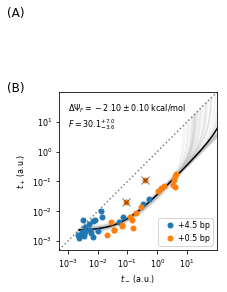

In [5]:
### Figure 2: Occlusion measurements ###
fig, _ = plt.subplots(figsize=[halfcolwidth,4])

gs = gridspec.GridSpec(1, 1, top=.70, bottom=.12, left=.25, right=.98)
ax = plt.subplot(gs[0,0])
lim = [5E-4,1E2]

# Plot styles
samples_labels_colors = [
    ('61c-ocl.35L', '+4.5 bp', colors[0]),
    ('oc0.35', '+0.5 bp', colors[1]),
]

# Extract best fit model
t_sat_best = np.exp(ocl_model_df.loc['best','log_tsat'])
t_bg_best = np.exp(ocl_model_df.loc['best','log_tbg'])
F_best = np.exp(ocl_model_df.loc['best','log_C'])

# Extract sampled fits
t_sat_sampled = np.exp(ocl_model_df['log_tsat'].values[1:])
t_bg_sampled = np.exp(ocl_model_df['log_tbg'].values[1:])
F_sampled = np.exp(ocl_model_df['log_C'].values[1:])

# Compute F values
F_50 = np.percentile(F_sampled,50)
F_16 = np.percentile(F_sampled,16)
F_84 = np.percentile(F_sampled,84)

# Plot sampled models
for (t_sat, t_bg, F) in zip(t_sat_sampled, t_bg_sampled, F_sampled):
    plot_manifold_model(ax=ax, 
                    t_sat=t_sat,
                    t_bg=t_bg,
                    alpha=0,
                    beta=1,
                    F=F,
                    color='silver',
                    opacity=.1
                    )
print('%d bootstrap samples'%len(F_sampled))

# Plot best fit model
plot_manifold_model(ax=ax, 
                    t_sat=t_sat_best,
                    t_bg=t_bg_best,
                    alpha=0,
                    beta=1,
                    F=F,
                    color='black',
                    #label='fit',
                    opacity=1,
                    lim=lim
                    )
# Plot measurements
num_points, num_outliers = plot_manifold_measurements(ax=ax, 
                               df=data_df, 
                               samples_labels_colors=samples_labels_colors, 
                               markersize=markersize, 
                               fontsize=fontsize,
                               lim=lim)

# Display Delta G
ocl_DeltaG = -kbt_to_kcal*np.log(F_50)
ocl_dDeltaG = kbt_to_kcal*.5*(np.log(F_84) - np.log(F_16))
dF_plus = F_84 - F_50
dF_minus = F_50 - F_16


text =  '$\Delta \Psi_F = %0.2f \pm %0.2f$ kcal/mol\n'%(ocl_DeltaG,ocl_dDeltaG) + \
        '$F = %.1f^{+%.1f}_{-%.1f}$\n'%(F_50, dF_plus, dF_minus)
ax.text(x=lim[0]*2, y=lim[1]/2, s=text, fontsize=fontsize,
        horizontalalignment='left', 
        verticalalignment='top')
# ax.set_xlim(lim)
# ax.set_ylim(lim)
ax.set_aspect('equal')
plt.figtext(.01,.98,'(A)', fontsize=panel_label_size, horizontalalignment='left', verticalalignment='top')
plt.figtext(.01,.72,'(B)', fontsize=panel_label_size, horizontalalignment='left', verticalalignment='top')
    
fig.savefig('../figures/plt_figure_2.pdf', transparent=True)

### Figure 4

100 bootstrap samples
n = 46-3 points plotted for  c61r18.35L + c61r18.10L
-61.5: DeltaG = -3.96 +/- 0.09
n = 21-0 points plotted for  c60
n = 47-3 points plotted for  c61
n = 23-0 points plotted for  c62
n = 11-1 points plotted for  c63
n = 8-0 points plotted for  c64
n = 20-0 points plotted for  c65
n = 22-1 points plotted for  c66
n = 36-1 points plotted for  c71
n = 19-0 points plotted for  c72
n = 22-0 points plotted for  c76
n = 22-0 points plotted for  c81
n = 17-0 points plotted for  c82


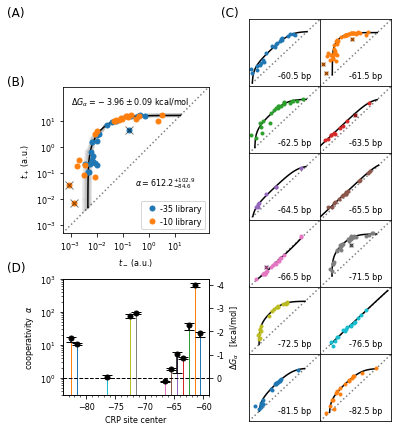

In [6]:
### Figure 4: Recruitment data ###

fig, _ = plt.subplots(figsize=[textwidth,6])

lim = [5E-4,2E2]

### Panel A

gs = gridspec.GridSpec(1, 1, top=.80, bottom=.45, left=.15, right=.52)
ax = plt.subplot(gs[0,0])

# Plot styles
samples_labels_colors = [
    ('c61r18.35L', '-35 library', colors[0]),
    ('c61r18.10L', '-10 library', colors[1]),
]

# Extract best fit model
t_sat_best = np.exp(c61_model_df.loc['best','log_tsat'])
t_bg_best = np.exp(c61_model_df.loc['best','log_tbg'])
eta_best = np.exp(c61_model_df.loc['best','log_eta'])

# Extract sampled fits
t_sat_sampled = np.exp(c61_model_df['log_tsat'].values[1:])
t_bg_sampled = np.exp(c61_model_df['log_tbg'].values[1:])
eta_sampled = np.exp(c61_model_df['log_eta'].values[1:])

# Compute corresponding alpha values; don't propagate errors though. 
alpha_best = eta_best + (eta_best-1)/F_50
alpha_sampled = eta_sampled + (eta_sampled-1)/F_50
alpha_50 = np.percentile(alpha_sampled,50)
alpha_84 = np.percentile(alpha_sampled,84)
alpha_16 = np.percentile(alpha_sampled,16)

# Plot sampled models
for (t_sat, t_bg, eta) in zip(t_sat_sampled, t_bg_sampled, eta_sampled):
    plot_manifold_model(ax=ax, 
                    t_sat=t_sat,
                    t_bg=t_bg,
                    alpha=alpha_sampled,
                    F = F_50,
                    color='silver',
                    opacity=.1,
                    )
print('%d bootstrap samples'%len(eta_sampled))

# Plot best fit model
plot_manifold_model(ax=ax, 
                    t_sat=t_sat_best,
                    t_bg=t_bg_best,
                    alpha=alpha_best,
                    F = F_50,
                    color='black',
                    #label='fit',
                    )
# Plot measurements
num_points, num_outliers = plot_manifold_measurements(ax=ax, 
                               df=data_df, 
                               samples_labels_colors=samples_labels_colors, 
                               markersize=markersize, 
                               fontsize=fontsize,
                               lim=lim)

# Display Delta G
#plt.title('$\Delta G_\\alpha = %0.2f \pm %0.2f$ kcal/mol'%(c61_DeltaG,c61_dDeltaG))
#ax.text(x=1E0, y=3E-2, s='$\\alpha = 601^{+76}_{-86}$')
ax.set_xlim(lim)
ax.set_ylim(lim)
ax.set_aspect('equal')

# Compute energy for c61
alpha_best = eta_best
alpha_sampled = eta_sampled
kbt_to_kcal = 1/1.62

c61_DeltaG = -kbt_to_kcal*np.log(alpha_50)
c61_dDeltaG = kbt_to_kcal*.5*(np.log(alpha_84)-np.log(alpha_16))
print('-61.5: DeltaG = %0.2f +/- %0.2f'%(c61_DeltaG, c61_dDeltaG))

dalpha_plus = alpha_84 - alpha_50
dalpha_minus = alpha_50 - alpha_16

text_1 = '$\\Delta G_\\alpha = %0.2f \\pm %0.2f$ kcal/mol\n'%(c61_DeltaG, c61_dDeltaG)
text_2 = '$\\alpha = %.1f^{+%.1f}_{-%.1f}$\n '%(alpha_50, dalpha_plus, dalpha_minus)
ax.text(x=lim[0]*2, y=lim[1]/2, s=text_1, fontsize=fontsize,
        horizontalalignment='left', 
        verticalalignment='top')
ax.text(x=3E-1, y=1E-1, s=text_2, fontsize=fontsize,
        horizontalalignment='left', 
        verticalalignment='top')
#ax.set_title('CRP at -61.5 bp')

### Panel B
gs = gridspec.GridSpec(6, 2, top=.95, bottom=.02, left=.62, right=.98, wspace=.0, hspace=.0)

samples_dists = [
    ('c60',60.5), 
    ('c61',61.5),
    ('c62',62.5), 
    ('c63',63.5), 
    ('c64',64.5),
    ('c65',65.5),
    ('c66',66.5),
    ('c71',71.5), 
    ('c72',72.5),
    ('c76',76.5),
    ('c81',81.5),
    ('c82',82.5)]

# Get default color list
prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']

for n, pair in enumerate(samples_dists):
    row = int(n/2)
    col = n%2
    
    ax = plt.subplot(gs[row,col])
    
    sample = pair[0]
    dist = pair[1]
    
    color = colors[n%len(colors)]
    #x.set_aspect(1)
    samples_labels_colors = [(sample,None,color)]
    
    t_sat = distance_df.loc[dist,'tsat']
    t_bg = distance_df.loc[dist,'tbg']
    alpha = distance_df.loc[dist,'alpha']
    
    # Plot model
    plot_manifold_model(ax, t_sat=t_sat, t_bg=t_bg, alpha=alpha, F=F_50, color='black')
    
    # Plot measurements, 
    num_points, num_outliers = plot_manifold_measurements(ax,data_df,samples_labels_colors, 
                                                           markersize=3, xlabel='', ylabel='', 
                                                           fontsize=9, show_legend=False, lim=lim)
    ax.set_xticks([])
    ax.set_yticks([])
    
    # Set title
    ax.text(x=1E-1, y=3E-4, s='-%.1f bp\n'%dist)
    #ax.set_title('-%.1f bp'%dist)
    
### Panel C

gs = gridspec.GridSpec(1, 1, top=.35, bottom=.08, left=.15, right=.52)
ax = plt.subplot(gs[0,0])

# Get data
distances = -distance_df.index
xlim = [min(distances)-1.5, max(distances)+1.5]
alpha = distance_df['alpha']
dalpha_low = distance_df['alpha'] - distance_df['alpha_16']
dalpha_hi = distance_df['alpha_84'] - distance_df['alpha']

### Plot alphas
alpha_lims = np.array([3E-1,1E3])
ax.errorbar(distances,alpha,
            yerr=[dalpha_hi, dalpha_low], 
            linestyle='none', marker='o', 
            markersize=markersize, capsize=markersize, color='k')
#ax.stem(distances,alpha,bottom=1,linefmt=':',markerfmt='.k')
ax.set_yscale("log", nonposy='clip')
ax.set_ylim(alpha_lims)
ax.axhline(1, linestyle='--', color='k', linewidth=1)
ax.set_ylabel('cooperativity  $\\alpha$')
ax.set_xlim(xlim)
#ax.set_xticks([])
#ax.set_xlabel('')
ax.set_xlabel('CRP site center')

# Show minor tick marks on x
from matplotlib.ticker import AutoMinorLocator
minorLocator = AutoMinorLocator()
ax.xaxis.set_minor_locator(minorLocator)

# Draw stems
for d, a in zip(distances,alpha):
    ax.plot([d,d], [.1,a], '-', linewidth=1, zorder=-100)

energy_lims = np.log(alpha_lims)/1.62
ax2 = ax.twinx()
ax2.set_ylim(energy_lims)
ax2.set_ylabel('$\\Delta G_\\alpha$   [kcal/mol]')
ax2.set_yticks([0,1,2,3,4])
ax2.set_yticklabels([0,-1,-2,-3,-4])

    
# Tight layout
panel_label_size=12
plt.figtext(.01,.98,'(A)', fontsize=panel_label_size, horizontalalignment='left', verticalalignment='top')
plt.figtext(.01,.82,'(B)', fontsize=panel_label_size, horizontalalignment='left', verticalalignment='top')
plt.figtext(.55,.98,'(C)', fontsize=panel_label_size, horizontalalignment='left', verticalalignment='top')
#plt.figtext(.50,.82,'(D)', fontsize=panel_label_size, horizontalalignment='left', verticalalignment='top')
plt.figtext(.01,.39,'(D)', fontsize=panel_label_size, horizontalalignment='left', verticalalignment='top')
    
fig.savefig('../figures/plt_figure_4.pdf', transparent=True)


### Figure 6

n = 47-3 points plotted for  c61
n = 18-0 points plotted for  r17.35con10L + r17.10con35L
16.0^{+0.8}_{-1.2}


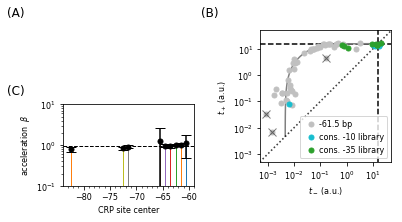

In [7]:
### Figure 6: Acceleration data ###

# Create figure and axes
fig, _ = plt.subplots(figsize=[textwidth,3])
color='black'

gs = gridspec.GridSpec(2, 2, top=.98, bottom=.15, left=.15, right=.98, wspace=.5)
ax = plt.subplot(gs[:,1])

# Specify which data points to plot in which colors
samples_labels_colors = [
    ('c61', '-61.5 bp', 'silver'),
    ('r17.35con10L','cons. -10 library',colors[9]),
    ('r17.10con35L','cons. -35 library',colors[2]),
]

# background line
#ax.axvline(t_bg_best,linestyle='--',color='r', alpha=.5)

#saturation line
ax.axhline(t_sat_best,linestyle='--',color='black')
ax.axvline(t_sat_best,linestyle='--',color='black')

# Draw best fit model
plot_manifold_model(ax, t_sat=t_sat_best, t_bg=t_bg_best, alpha=alpha_best, beta=1, F = 1000,
                    color='gray')
    
# Draw measurements
plot_manifold_measurements(ax, data_df, samples_labels_colors[:1], 
                           markersize=markersize, 
                           fontsize=fontsize)
num_points, num_outliers = plot_manifold_measurements(ax, data_df, samples_labels_colors[1:], 
                                       markersize=markersize, 
                                       fontsize=fontsize)
ax.set_aspect('equal')

# text = '$n = %d$'%(num_points)
# ax.text(x=3E-1, y=1E-1, s=text, fontsize=fontsize,
#         horizontalalignment='left', 
#         verticalalignment='top')

### variable distance acceleration plot
ax = plt.subplot(gs[1,0])

# Plot tsat, but only if error bar is small enough
tsat = distance_df['tsat_50']
dtsat_low = distance_df['tsat'] - distance_df['tsat_16']
dtsat_hi = distance_df['tsat_84'] - distance_df['tsat']
ind = (distance_df['tsat_84'] / distance_df['tsat_16'] < 1E2)
ind &= (distances != -66.5)

s = '%.1f^{+%.1f}_{-%.1f}'%(tsat[61.5],dtsat_low[61.5],dtsat_hi[61.5])
print(s)

tsat_ref = distance_df.loc[61.5, 'tsat']

tsat_med = np.median(tsat[ind])
ax.axhline(tsat_med/tsat_ref, linestyle='--', color='k', linewidth=1)
ax.errorbar(distances[ind], 
            tsat[ind]/tsat_ref,
            yerr=[dtsat_hi[ind]/tsat_ref, dtsat_hi[ind]/tsat_ref], 
            linestyle='none', 
            marker='o', 
            markersize=markersize, 
            capsize=markersize, 
            color='k')

ax.set_yscale("log", nonposy='clip')
ax.set_ylim([.1,10])
ax.set_xlim(xlim)
ax.set_ylabel('acceleration  $\\beta$')
ax.set_xlabel('CRP site center')

# Show minor tick marks on x
from matplotlib.ticker import AutoMinorLocator
minorLocator = AutoMinorLocator()
ax.xaxis.set_minor_locator(minorLocator)

# Draw stems
tsat = tsat.values/tsat_ref
ind = ind.values
for n, d in enumerate(distances):
    t = tsat[n]
    if ind[n]:
        ax.plot([d,d], [.01,t], '-', linewidth=1, zorder=-100)
    else:
        ax.plot([d,d], [.01,.02], '-', linewidth=1, zorder=-100)

        
plt.figtext(.01,.98,'(A)', fontsize=panel_label_size, horizontalalignment='left', verticalalignment='top')
plt.figtext(.50,.98,'(B)', fontsize=panel_label_size, horizontalalignment='left', verticalalignment='top')
plt.figtext(.01,.62,'(C)', fontsize=panel_label_size, horizontalalignment='left', verticalalignment='top')
        
fig.savefig('../figures/plt_figure_6.pdf', transparent=True)

### Figure 8

n = 20-2 points plotted for  gal.
n = 30-0 points plotted for  c40.10L


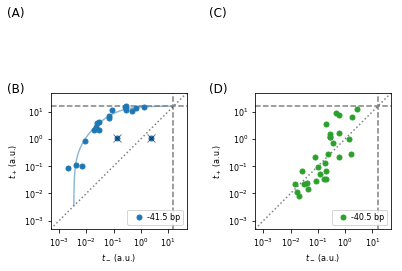

In [8]:
###

fig, _ = plt.subplots(figsize=[textwidth,3.75])
gs = gridspec.GridSpec(1, 2, top=.70, bottom=.12, left=.12, right=.98, hspace=0, wspace=.5)

### Panel B

# P values for continuous curve
Ps = np.logspace(-7,1,100)

ax = plt.subplot(gs[0,0])

# Plot styles
samples_labels_colors = [
    ('gal.', '-41.5 bp', colors[0]),
    #('c41', '-41.5 bp (lac*)', colors[1]),
]

# Plot measurements
ax.axhline(t_sat_best,linestyle='--',color='gray')
ax.axvline(t_sat_best,linestyle='--',color='gray')

n1, o1 = plot_manifold_measurements(ax=ax, 
                           df=data_df, 
                           samples_labels_colors=samples_labels_colors[:1], 
                           markersize=markersize, 
                           fontsize=fontsize)
# n2, o2 = plot_manifold_measurements(ax=ax, 
#                            df=data_df, 
#                            samples_labels_colors=samples_labels_colors[1:], 
#                            markersize=markersize, 
#                            fontsize=fontsize)

# text = '$n = %d-%d$'%(n1, o1)
# ax.text(x=8E-4, y=1.2E1, s=text, fontsize=fontsize,
#         horizontalalignment='left', 
#         verticalalignment='top', color=colors[0])

# text = '$n = %d-%d$'%(n2, o2)
# ax.text(x=3E-1, y=3E-2, s=text, fontsize=fontsize,
#         horizontalalignment='left', 
#         verticalalignment='top', color=colors[1])

ax.set_aspect('equal')

# Draw curves
t_sat = 16
t_bg = 0.0035
alpha_act = 174.00292725
alpha_rep = 0.363105202699

xs = thermodynamic_model(t_sat=t_sat, P=Ps, F=0, alpha=1, beta=1, t_bg=t_bg)
ys_act = thermodynamic_model(t_sat=t_sat, P=Ps, F=20, alpha=200, beta=1, t_bg=t_bg)
ys_rep = thermodynamic_model(t_sat=t_sat, P=Ps, F=20, alpha=1/3, beta=1, t_bg=t_bg)

ax.plot(xs,ys_act,'-',color=colors[0],zorder=-100, alpha=.5)
#ax.plot(xs,ys_rep,'-',color=colors[1],zorder=-100, alpha=.5)

### Panel B

ax = plt.subplot(gs[0,1])

# Plot styles
samples_labels_colors = [
    ('c40.10L', '-40.5 bp', colors[2]),
]

# Plot measurements
ax.axhline(t_sat_best,linestyle='--',color='gray')
ax.axvline(t_sat_best,linestyle='--',color='gray')

n3, o3 = plot_manifold_measurements(ax=ax, 
                           df=data_df, 
                           samples_labels_colors=samples_labels_colors, 
                           markersize=markersize, 
                           fontsize=fontsize)

# text = '$n = %d$'%(n3)
# ax.text(x=3E-1, y=1E-2, s=text, fontsize=fontsize,
#         horizontalalignment='left', 
#         verticalalignment='top')

ax.set_aspect('equal')


### Add panel labels
plt.figtext(.01,.98,'(A)', fontsize=panel_label_size, horizontalalignment='left', verticalalignment='top')
plt.figtext(.01,.70,'(B)', fontsize=panel_label_size, horizontalalignment='left', verticalalignment='top')
plt.figtext(.52,.98,'(C)', fontsize=panel_label_size, horizontalalignment='left', verticalalignment='top')
plt.figtext(.52,.70,'(D)', fontsize=panel_label_size, horizontalalignment='left', verticalalignment='top')

fig.savefig('../figures/plt_figure_8.pdf', transparent=True)

In [9]:
### Create Result comparison table ###
cols = [c for c in distance_df.columns if 'alpha_' in c]
df = distance_df[cols].copy()

gaston_dict = {
    -60.5: '3.85',
    -61.5: '9.05',
    -62.5: '4.22',
    -66.5: '0.78',
    -71.5: '2.50',
    -72.5: '3.49',
    -76.5: '0.54'
}
for k,v in gaston_dict.items():
    df.loc[-k,'gaston'] = v
    
ushida_dict = {
    -61.5: '20.6',
    -66.5: '0.84',
    -71.5: '16.4',
    -82.5: '6.99'
}

for k,v in ushida_dict.items():
    df.loc[-k,'ushida'] = v
    
df.fillna('',inplace=True)

print(df)
print('')

for pos, row in df.iterrows():
    
    # Compute alpha
    alpha = row['alpha_50']
    dalpha_plus = row['alpha_84'] - alpha
    dalpha_minus = alpha - row['alpha_16']
    
    # Compute energy
    DeltaG = -kbt_to_kcal*np.log(alpha)
    dDeltaG = 0.5*kbt_to_kcal*(np.log(row['alpha_84']) - np.log(row['alpha_16']))
    
    if alpha > 100:
        alpha_str = '%d'%alpha
    elif alpha > 10:
        alpha_str = '%.1f'%alpha
    else:
        alpha_str = '%.2f'%alpha
    
    gaston = row['gaston']
    ushida = row['ushida']
    
    print('%.1f & $%.2f \\pm %.2f$ & %s & %s & %s \\\\'% (-pos, DeltaG, dDeltaG, alpha_str, gaston, ushida))

            alpha_16    alpha_50    alpha_84 gaston ushida
distance                                                  
60.5       20.887808   23.712014   28.063931   3.85       
61.5      528.048098  612.752297  715.712526   9.05   20.6
62.5       35.838493   45.108190   52.925123   4.22       
63.5        3.869069    4.205120    4.565945              
64.5        4.748273    5.902421    9.521967              
65.5        1.828591    1.896254    1.987006              
66.5        0.748062    0.790664    0.836437   0.78   0.84
71.5       86.145616   95.068374  102.312065   2.50   16.4
72.5       68.919373   78.980884   89.109762   3.49       
76.5        0.897358    1.043320    1.168271   0.54       
81.5        9.345510   10.272497   10.945368              
82.5       14.057447   16.150145   18.822067          6.99

-60.5 & $-1.95 \pm 0.09$ & 23.7 & 3.85 &  \\
-61.5 & $-3.96 \pm 0.09$ & 612 & 9.05 & 20.6 \\
-62.5 & $-2.35 \pm 0.12$ & 45.1 & 4.22 &  \\
-63.5 & $-0.89 \pm 0.05$ & 4.21 &  

Sample c60: 20 points plotted.
Sample c61: 41 points plotted.
Sample c62: 22 points plotted.
Sample c63: 10 points plotted.
Sample c64: 7 points plotted.
Sample c65: 0 points plotted.
Sample c66: 0 points plotted.
Sample c71: 28 points plotted.
Sample c72: 0 points plotted.
Sample c76: 0 points plotted.
Sample c81: 18 points plotted.
Sample c82: 0 points plotted.


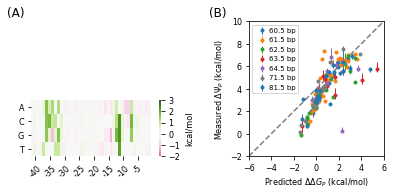

In [10]:
### Figure 7 ###

fig, ax = plt.subplots(1,1,figsize=[textwidth,2.5])
gs = gridspec.GridSpec(2, 2, top=.90, bottom=.15, left=.07, right=.98, hspace=.4, wspace=.4)

## Display RNAP model ##
ax = plt.subplot(gs[1,0])

import seaborn as sns

matrix_df = pd.read_csv('../data/literature/rnap_tau_final_all.41.matrix.txt', delim_whitespace=True)

# I'm pretty sure this is the lac* sequence
wt_seq = 'CAGGCTTTACACCTGTTGCCTCCGGCTCGTATGTTGTGTGG'
L = len(wt_seq)

for i, c in enumerate(wt_seq):
    matrix_df.loc[i,:] -= matrix_df.loc[i,c]

sns.heatmap(data=matrix_df.T, ax=ax, cmap="PiYG", center=0, vmax=3, vmin=-2, cbar_kws={'label': 'kcal/mol'})
ax.set_xticks(np.arange(1,L,5)+.5)
ax.set_xticklabels(np.arange(-L+1,0,5), rotation=45)
ax.set_yticks(np.arange(4)+.5)
ax.set_yticklabels(list('ACGT'), rotation=0)
#ax.set_aspect(4)
sns.reset_orig()

## Display scatter plot ##
ax = plt.subplot(gs[:,1])

# Read in matrix vs. measurement data for log P
df = pd.read_csv('../intermediate/matrix_vs_P.txt', delim_whitespace=True)

# Get normalized matrix energy
matrix_energy = -df['matrix_energy'].values
matrix_energy -= matrix_energy[0]

# Get measured energy
measured_energy_50 = -df['log_P_50/1.62'].values
measured_energy_16 = -df['log_P_16/1.62'].values
measured_energy_84 = -df['log_P_84/1.62'].values

# Comptue error bars
dy_minus = measured_energy_50-measured_energy_84
dy_plus = measured_energy_16-measured_energy_50
yerr = np.array([dy_minus, dy_plus])

# Find b that minimizes sum((x+b-y)**2). Answer is simple:
b = matrix_energy.mean()-measured_energy_50.mean()

# Compute lims
ylim = np.array([-2,+10])
xlim = np.array([-6,6])

# Plot best-fit diagonal line
ax.plot(xlim, ylim, '--', color='gray')

# Plot in different colors
samples_dists = [
    ('c60',60.5), 
    ('c61',61.5),
    ('c62',62.5), 
    ('c63',63.5), 
    ('c64',64.5),
    ('c65',65.5),
    ('c66',66.5),
    ('c71',71.5), 
    ('c72',72.5),
    ('c76',76.5),
    ('c81',81.5),
    ('c82',82.5)]

# Get default color list
prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']

for n, pair in enumerate(samples_dists):
    row = int(n/2)
    col = n%2
        
    sample = pair[0]
    spacing_str = '%.1f bp'%pair[1]
    color = colors[n%len(colors)]
    indices = [sample in name for name in df['name']]
    
    # Plot data
    if sum(indices) > 0:
        ax.errorbar(matrix_energy[indices], measured_energy_50[indices], yerr[:,indices], 
                    marker='o', markersize=3, color=color, linestyle='none', elinewidth=1, label=spacing_str)
    
    print('Sample %s: %d points plotted.'%(sample,sum(indices)))

ax.legend(handletextpad=0, fontsize=7)
    
# Style plot
ax.set_ylabel('Measured $\Delta \Psi_P$ (kcal/mol)')
ax.set_xlim(xlim)
ax.set_xticks([-6,-4,-2,0,2,4,6])
ax.set_xlabel('Predicted $\Delta\Delta G_P$ (kcal/mol)')
ax.set_ylim(ylim)
ax.set_yticks([-2,0,2,4,6,8,10])
ax.set_aspect('equal')

### Add panel labels
plt.figtext(.01,.98,'(A)', fontsize=panel_label_size, horizontalalignment='left', verticalalignment='top')
plt.figtext(.52,.98,'(B)', fontsize=panel_label_size, horizontalalignment='left', verticalalignment='top')

plt.savefig('../figures/plt_figure_7.pdf', transparent=True)

In [11]:
data_df.head()

,loc,median_basal,median_induced,inliers
name,,,,
c61r18,b1A1,0.224534,15.535757,True
c61r18.35L02,b1B7,0.165658,4.538436,False
c61r18.35L03,b1B8,0.003550,0.212003,True
c61r18.35L04,b1B9,0.006600,1.548374,True
c61r18.35L05,b1C1,0.006720,0.315835,True


n = 45-0 points plotted for  c76 + 61c-r
Plotting 45 points. R^2 = 0.960


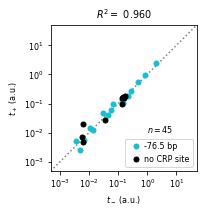

In [12]:
from scipy.stats import pearsonr
fig, ax = plt.subplots(1,1,figsize=[3,3])

# Plot growth rates vs. cAMP concentration


# Plot +/- cAMP expression
samples_labels_colors = [
    #('c65', '-65.5', colors[5]),
    #('c66', '-66.5', colors[6]),
    ('c76', '-76.5 bp', colors[9]),
    ('61c-r', 'no CRP site', 'k'),
]

num_points, _ = plot_manifold_measurements(ax=ax, 
                           df=data_df, 
                           samples_labels_colors=samples_labels_colors, 
                           markersize=markersize, 
                           fontsize=fontsize, show_outliers=False)

# Quantify deviation from diagonal
patterns = [s[0] for s in samples_labels_colors]
indices = [any([p in name for p in patterns]) for name in data_df.index]


text = '$n = %d$'%(num_points)
ax.text(x=1E0, y=2E-2, s=text, fontsize=fontsize,
        horizontalalignment='left', 
        verticalalignment='top')

tmp_df = data_df[indices].dropna()
xs = np.log(tmp_df['median_basal'].values)
ys = np.log(tmp_df['median_induced'].values)
r, p = pearsonr(xs,ys)

print('Plotting %d points. R^2 = %0.3f' % (num_points, r**2))
ax.set_facecolor('w')
fig.patch.set_facecolor((0,0,0,0))
ax.set_aspect('equal')
ax.set_title('$R^2 = $ %0.3f' % (r**2))
plt.tight_layout()
plt.savefig('../figures/plt_figure_crp_null.pdf')
plt.show()

### 